In [16]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
from utils import sigmoid, get_batches, compute_pca, get_dict
import re 

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/aziiz/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
nltk.data.path.append('.')

In [19]:
with open('./data/sentences.txt' , encoding='utf8') as f:
    data = f.read()                                                  
data = re.sub(r'[,!?;-]', '.',data)                                  
data = nltk.word_tokenize(data)                                     
data = [ ch.lower() for ch in data if ch.isalpha() or ch == '.']     
print("Number of tokens:", len(data),'\n', data[:15])                

Number of tokens: 48854 
 ['safiyetu', 'béey', 'céy', 'koronaa', '.', 'bii', 'yëngal', 'na', 'jamono', '.', 'ku', 'mënoon', 'a', 'gëm', 'lu']


In [20]:
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)

In [21]:
 def initialize_model(N,V, random_seed=1):
 
    np.random.seed(random_seed)
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    # W1 has shape (N,V)
    W1 = np.random.rand(N,V)
    # W2 has shape (V,N)
    W2 = np.random.rand(V,N)
    # b1 has shape (N,1)
    b1 = np.random.rand(N,1)
    # b2 has shape (V,1)
    b2 = np.random.rand(V,1)
    ### END CODE HERE ###

    return W1, W2, b1, b2

In [22]:
def softmax(z):
    yhat = np.exp(z) /  np.sum(np.exp(z) , axis=0)
    return yhat

In [23]:
def forward_prop(x, W1, W2, b1, b2):
    h = np.dot(W1,x) +b1
    h = np.maximum(0,h)
    z = np.dot(W2,h) + b2
    return z, h

In [24]:
def compute_cost(y, yhat, batch_size):
    logprobs = np.multiply(np.log(yhat),y) + np.multiply(np.log(1 - yhat), 1 - y)
    cost = - 1/batch_size * np.sum(logprobs)
    cost = np.squeeze(cost)
    return cost

In [25]:
def back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size):
 
    l1 = np.dot(W2.T,yhat-y)
    # Apply relu to l1
    l1 = np.maximum(0,l1)
    # Compute the gradient of W1
    grad_W1 = (1/batch_size) *np.dot(l1,x.T)
    # Compute the gradient of W2
    grad_W2 = (1/batch_size) * np.dot(yhat-y,h.T)
    # Compute the gradient of b1
    grad_b1 = np.sum((1/batch_size)*l1,axis=1,keepdims = True) 
    # Compute the gradient of b2
    grad_b2 =np.sum((1/batch_size)*(yhat-y),axis=1,keepdims = True)
    ### END CODE HERE ###
    
    return grad_W1, grad_W2, grad_b1, grad_b2

In [26]:
def gradient_descent(data, word2Ind, N, V, num_iters, alpha=0.03):
 
    W1, W2, b1, b2 = initialize_model(N,V, random_seed=282)
    batch_size = 128
    iters = 0
    C = 2
 
    for x, y in get_batches(data, word2Ind, V, C, batch_size):
        ### START CODE HERE (Replace instances of 'None' with your own code) ###
        # Get z and h
        z, h = forward_prop(x, W1, W2, b1, b2)
        # Get yhat
        yhat = softmax(z)
        # Get cost
        cost = compute_cost(y, yhat, batch_size)
        if ( (iters+1) % 10 == 0):
            print(f"iters: {iters + 1} cost: {cost:.6f}")
        # Get gradients
        grad_W1, grad_W2, grad_b1, grad_b2 = back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size)
        
        # Update weights and biases
        W1 = W1-alpha* grad_W1
        W2 = W2-alpha*grad_W2
        b1 = b1 - alpha * b1
        b2 = b2 - alpha * b2
        
        iters += 1 
        if iters == num_iters: 
            break
        if iters % 100 == 0:
            alpha *= 0.66
            
    return W1, W2, b1, b2

In [27]:
C = 2
N = 50
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)
num_iters = 150
print("Call gradient_descent")
W1, W2, b1, b2 = gradient_descent(data, word2Ind, N, V, num_iters)

Call gradient_descent
iters: 10 cost: 3.757791
iters: 20 cost: 0.380485
iters: 30 cost: 0.286126
iters: 40 cost: 0.264433
iters: 50 cost: 0.248031
iters: 60 cost: 0.228717
iters: 70 cost: 0.206855
iters: 80 cost: 0.184288
iters: 90 cost: 0.162596
iters: 100 cost: 0.142744
iters: 110 cost: 0.130289
iters: 120 cost: 0.119508
iters: 130 cost: 0.109738
iters: 140 cost: 0.100925
iters: 150 cost: 0.093001


In [28]:
#['safiyetu', 'béey', 'céy', 'koronaa', '.', 'bii', 'yëngal', 'na', 'jamono', '.', 'ku', 'mënoon', 'a', 'gëm', 'lu']
from matplotlib import pyplot
%config InlineBackend.figure_format = 'svg'
words = ['ne', 'ba','safiyetu','béey', 'koronaa','bii','yëngal',
         'jamono','ku','mënoon']

embs = (W1.T + W2)/2.0
 
# given a list of words and the embeddings, it returns a matrix with all the embeddings
idx = [word2Ind[word] for word in words]
X = embs[idx, :]

print(X.shape, idx)   
print("je suis la ")


(10, 50) [3053, 212, 3650, 482, 2176, 341, 5194, 1732, 2185, 2880]
je suis la 


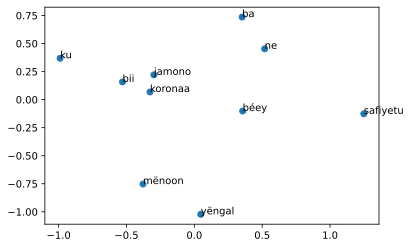

In [29]:
result= compute_pca(X, 2)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

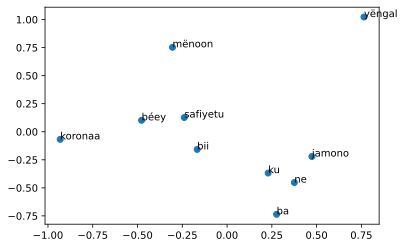

In [30]:
result= compute_pca(X, 4)
pyplot.scatter(result[:, 3], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 3], result[i, 1]))
pyplot.show()